# Exploratory Data Analysys (EDA)
## Costumer loans dataset


 **Cel Biznesowy**: Celem projektu będzie jest zbudowanie modelu predykcyjnego który na podstwie dostępnych cech będzie w stanie określić czy dana osoba dostanie  kredyt(1) czy też nie (0) (czyli kolumne FINALIZED_LOAN)  
 **Zmienna celu**: FINALIZED_LOAN
 

In [5]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import  Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("orig_train.csv")
df.head(10)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.0,7,...,1,0,0,0,0,0,0,0,0,0
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0,7,...,12,0,0,0,0,0,0,0,0,0
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.0,4,...,2,0,0,0,0,0,0,0,0,1
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8,20,...,1,1,1,0,0,0,0,0,0,0
9,F,34,County capital,Living with family,Post-graduate,married,3,1,2373.0,4,...,13,0,0,0,0,0,0,0,0,0


In [7]:
len(df)

15097

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [9]:
df.isnull().sum()

PRODUCT                            0
AGE                                0
AREA                               0
RESIDENTIAL_PLACE                  0
EDUCATION                          0
MARITAL_STATUS                     0
HOUSEHOLD_MEMBERS                  0
NO_OF_DEPENDENTS                   0
INCOME                             0
WORK_SENIORITY                     0
BUSINESS AGE                       0
ECONOMIC_SECTOR                    0
EMPLOYEE_NO                        0
LENGTH_RELATIONSHIP_WITH_CLIENT    0
DEBIT_CARD                         0
CURRENT_ACCOUNT                    0
SAVING_ACCOUNT                     0
SALARY_ACCOUNT                     0
FOREIGN_ACCOUNT                    0
FINALIZED_LOAN                     0
DEPOSIT                            0
PENSION_FUNDS                      0
DEFAULT_FLAG                       0
dtype: int64

### nie mamy w ramce żadnych braków danych

In [10]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [11]:
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**BUSINESS AGE** -  The number of years the business where the client is employed has been operational.  
**ECONOMIC SECTOR** -  The economic sector in which the client works.  
**EMPOLYEE_NO** -  The number of employees in the company where the client works.  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank    
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - Wheter the client fully repaid the loan  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG**- A binary indicator showing whether the client has been granted a loan by the bank (e.g., Yes/No, 1/0).


In [12]:
df.var()

AGE                                1.811976e+02
HOUSEHOLD_MEMBERS                  5.773615e-01
NO_OF_DEPENDENTS                   2.431821e-01
INCOME                             3.140527e+06
WORK_SENIORITY                     3.189722e+01
BUSINESS AGE                       1.556983e+02
LENGTH_RELATIONSHIP_WITH_CLIENT    2.401933e+01
DEBIT_CARD                         2.365866e-01
CURRENT_ACCOUNT                    2.498052e-01
SAVING_ACCOUNT                     3.972983e-04
SALARY_ACCOUNT                     1.080314e-01
FOREIGN_ACCOUNT                    1.324679e-04
FINALIZED_LOAN                     1.372507e-01
DEPOSIT                            3.695832e-03
PENSION_FUNDS                      0.000000e+00
DEFAULT_FLAG                       5.395822e-02
dtype: float64

## Rozkłady zmiennych numerycznych

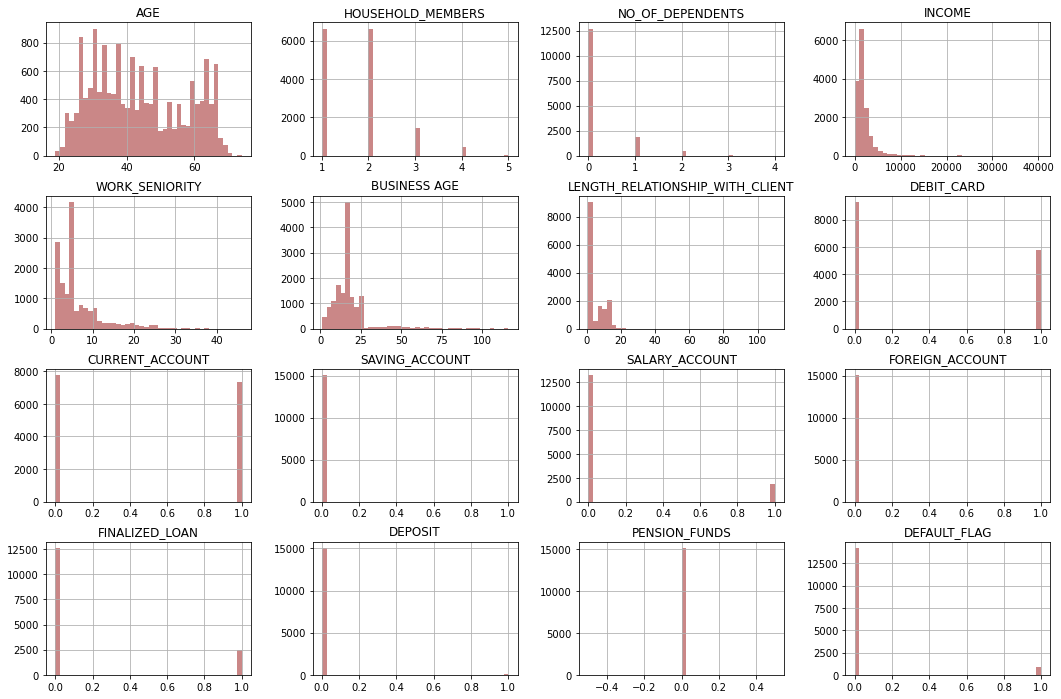

In [13]:
df.hist(bins = 40, figsize=(18, 12), color='#CA8787')
plt.show()

In [14]:
print(df['SAVING_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['DEPOSIT'].value_counts())
print('-----------------------------------')
print(df['FOREIGN_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['PENSION_FUNDS'].value_counts())

0    15091
1        6
Name: SAVING_ACCOUNT, dtype: int64
-----------------------------------
0    15041
1       56
Name: DEPOSIT, dtype: int64
-----------------------------------
0    15095
1        2
Name: FOREIGN_ACCOUNT, dtype: int64
-----------------------------------
0    15097
Name: PENSION_FUNDS, dtype: int64


### Bardzo dużo wartości 0 w kolumach SAVING_ACCOUNT, DEPOSIT, FOREIGN_ACCOUNT. Przeanalizujemy potem ich wpływ na predykcyjność modelu i rozważymy usunięcie.  PENSION_FUNDS możemy usunąć już na tym etapie ponieważ to całkowicie zerowa, nic nie wnosząca kolumna

In [15]:
df = df.drop("PENSION_FUNDS", axis = 1)

## Rozkłady zmiennych kategorycznych

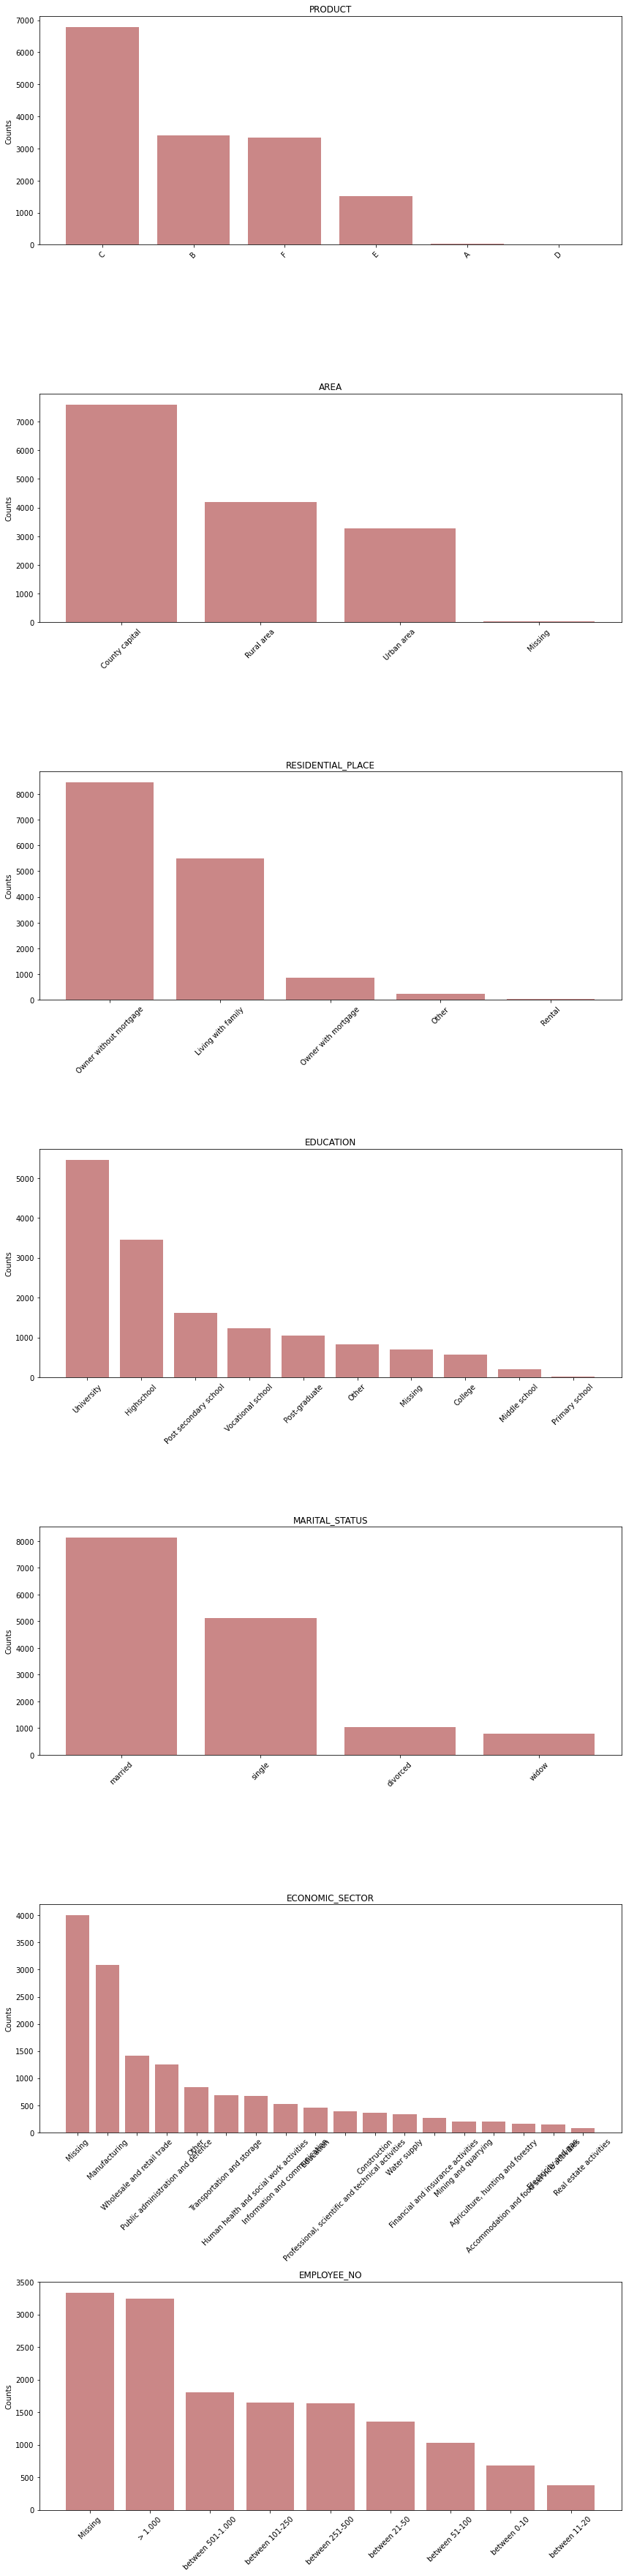

In [16]:
df_strings = df[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']]
fig, axs = plt.subplots(nrows= 7, ncols=1, figsize=(12, 7 * 7))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']):
    value_counts = df[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values, color='#CA8787')
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

### w kolumach 'AREA' 'EDUCATION' 'ECONOMIC_SECTOR' , 'EMPOLYEE_NO'  mamy wartości 'missing', z czego w kolumnie 'AREA' jest ich bradzo mało, natomiast w pozostałych kolumach jest ich znaczy odsetek, być może wynika to z tego, że dana  osoba już nie pracuje, bądź nie uczy/uczyła się

### zobaczmy jak wartości 'missing' w  kolumnach economic_sector i empolyee_no zależą od wieku

Text(0, 0.5, 'COUNT')

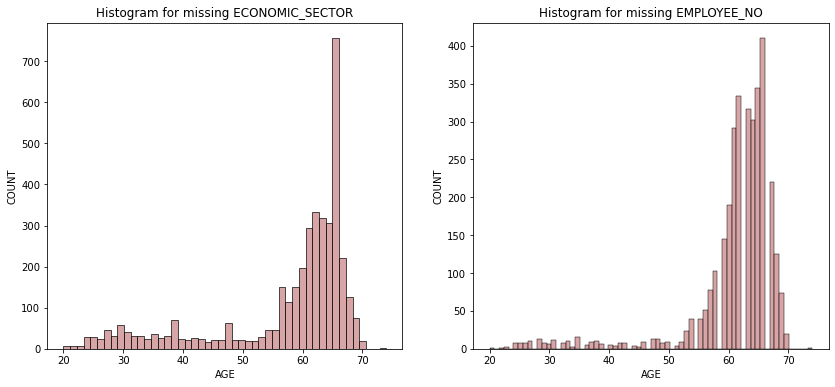

In [17]:
df_economic_missing = df[df['ECONOMIC_SECTOR']=='Missing']
df_employeen_missing=df[df['EMPLOYEE_NO']=='Missing']
fig, axs =plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=df_economic_missing, x='AGE', ax=axs[0], color='#CA8787')
axs[0].set_title('Histogram for missing ECONOMIC_SECTOR')
axs[0].set_xlabel('AGE')
axs[0].set_ylabel('COUNT')
sns.histplot(data=df_employeen_missing, x='AGE', ax=axs[1], color='#CA8787')
axs[1].set_title('Histogram for missing EMPLOYEE_NO')
axs[1].set_xlabel('AGE')
axs[1].set_ylabel('COUNT')

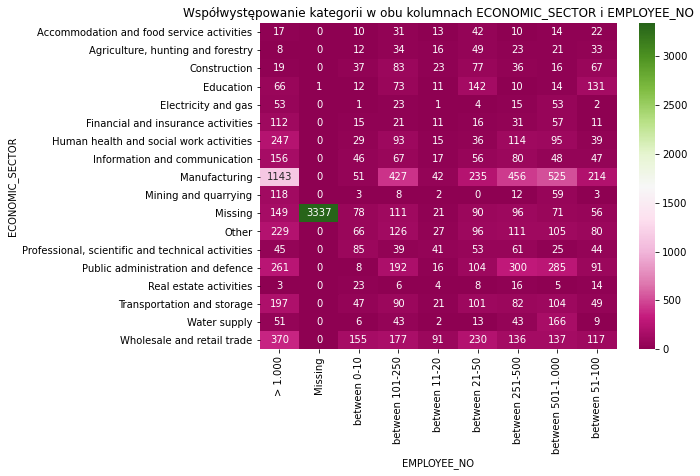

In [18]:
cross_tab = pd.crosstab(df['ECONOMIC_SECTOR'], df['EMPLOYEE_NO'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='PiYG', fmt='d')
plt.title('Współwystępowanie kategorii w obu kolumnach ECONOMIC_SECTOR i EMPLOYEE_NO')
plt.ylabel('ECONOMIC_SECTOR')
plt.xlabel('EMPLOYEE_NO')
plt.show()

### jak widzimy  występowanie wartości 'Missing' w kolumnie EMPLOYEE_NO jest zależne od występowania 'Missing' w kolumnie ECONOMIC_SECTOR, ponadto jak widać na histogramach, wartości te występują głównie dla osób 60+, wnioskujemy z tego, że to wartości 'missing' wynikają z tego, że dana osoba jest emerytem. 

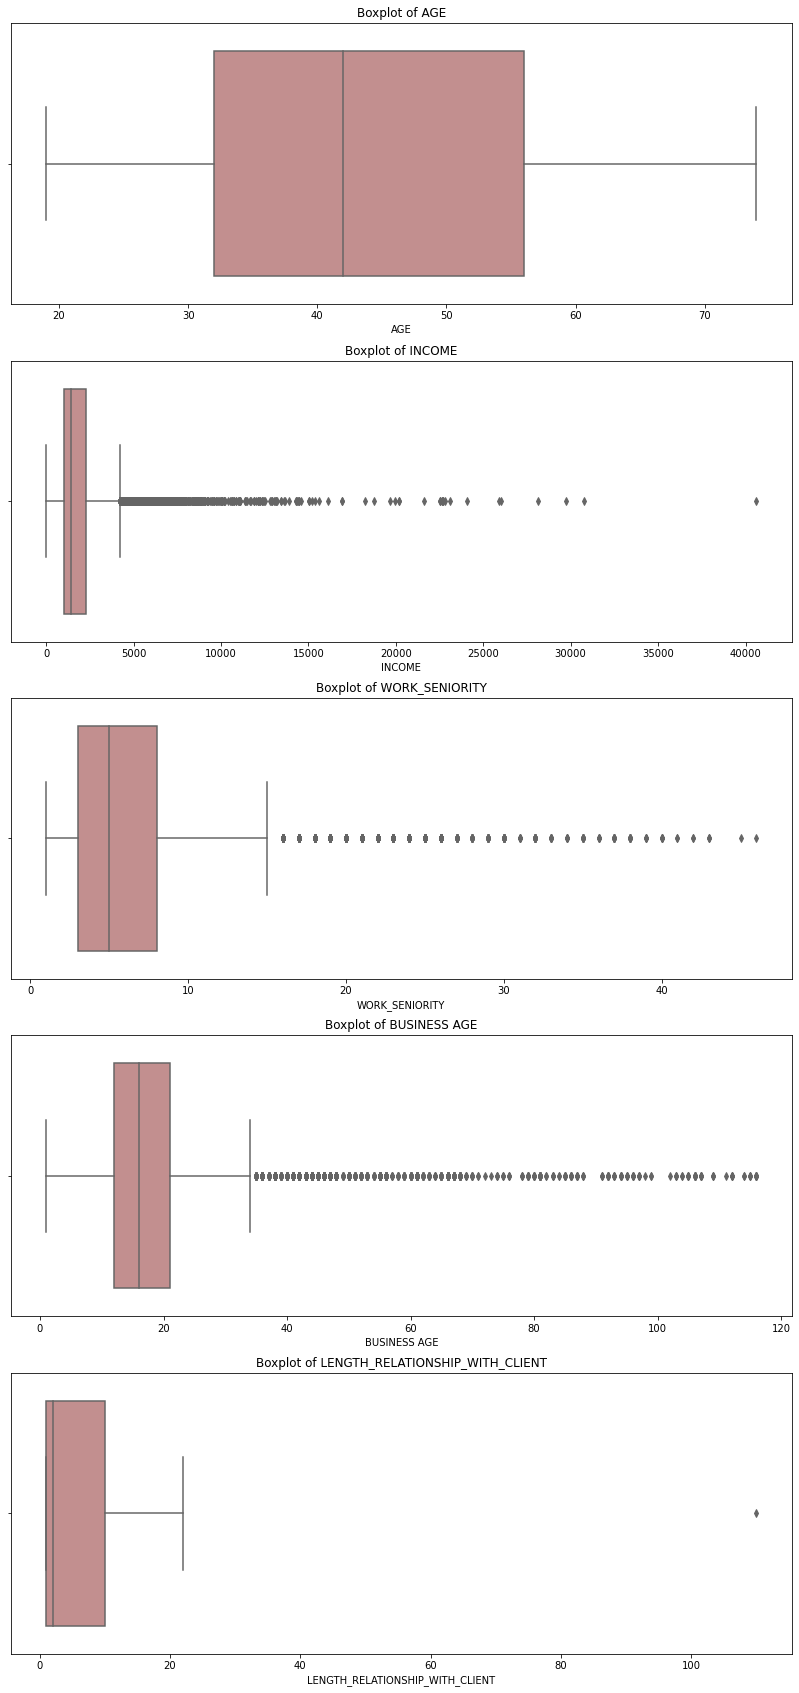

In [19]:
df_numerical = df.loc[:, ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']]
fig, axs = plt.subplots(len(df_numerical.columns), 1, figsize=(14, 30))

for i, column in enumerate(df_numerical.columns):
    sns.boxplot(data=df_numerical, x=column, ax=axs[i], color='#CA8787')
    axs[i].set_title(f'Boxplot of {column}')

In [20]:
outliers_count = {}

for column in df_numerical.columns:
    Q1 = df_numerical[column].quantile(0.25)
    Q3 = df_numerical[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_numerical[(df_numerical[column] < lower_bound) | (df_numerical[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]

for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in AGE: 0
Number of outliers in INCOME: 1054
Number of outliers in WORK_SENIORITY: 1268
Number of outliers in BUSINESS AGE: 997
Number of outliers in LENGTH_RELATIONSHIP_WITH_CLIENT: 1


#### sporo outlierów w 'INCOME', 'WORK_SENIORITY' i 'BUSINESS AGE'

### Macierz Korelacji zmiennych

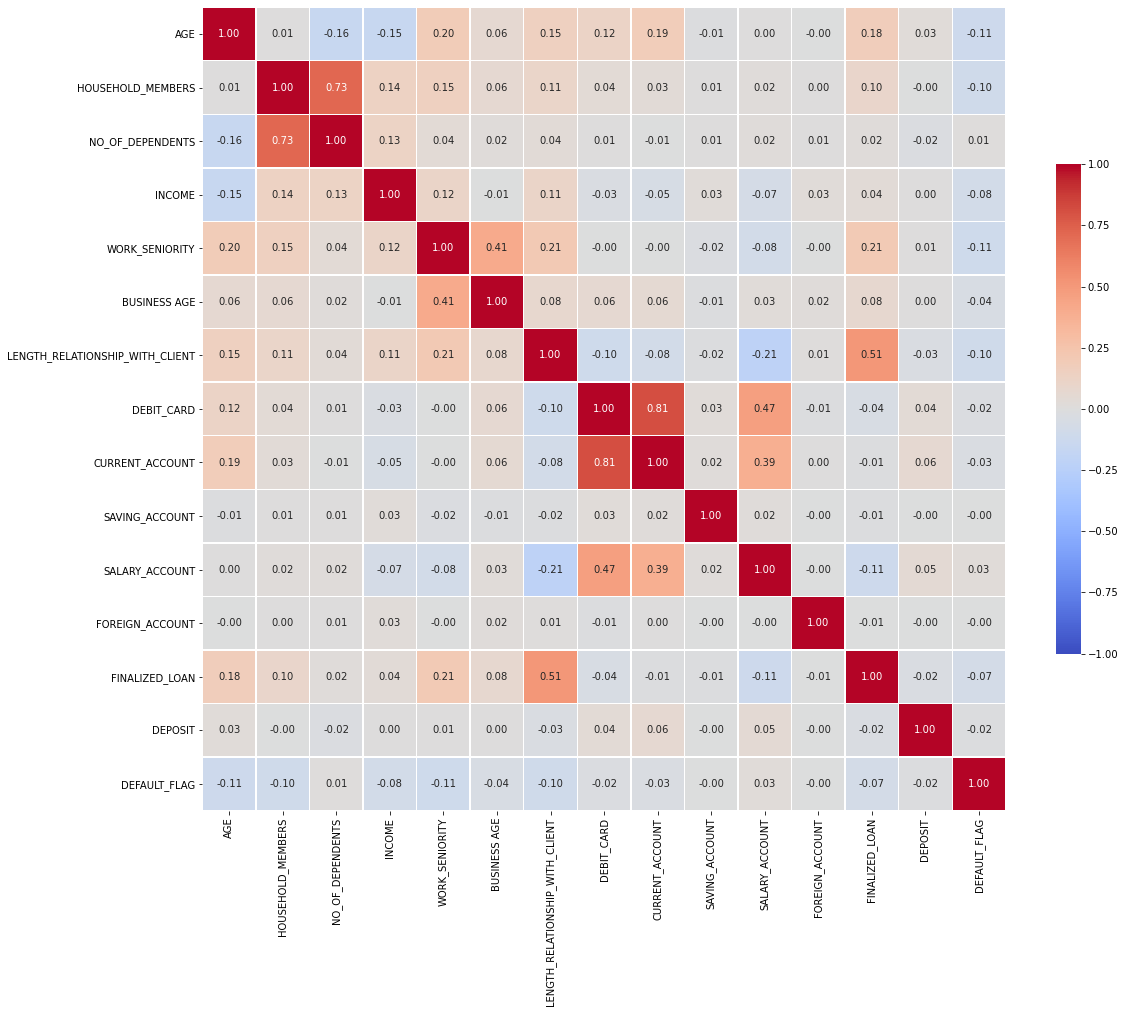

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()

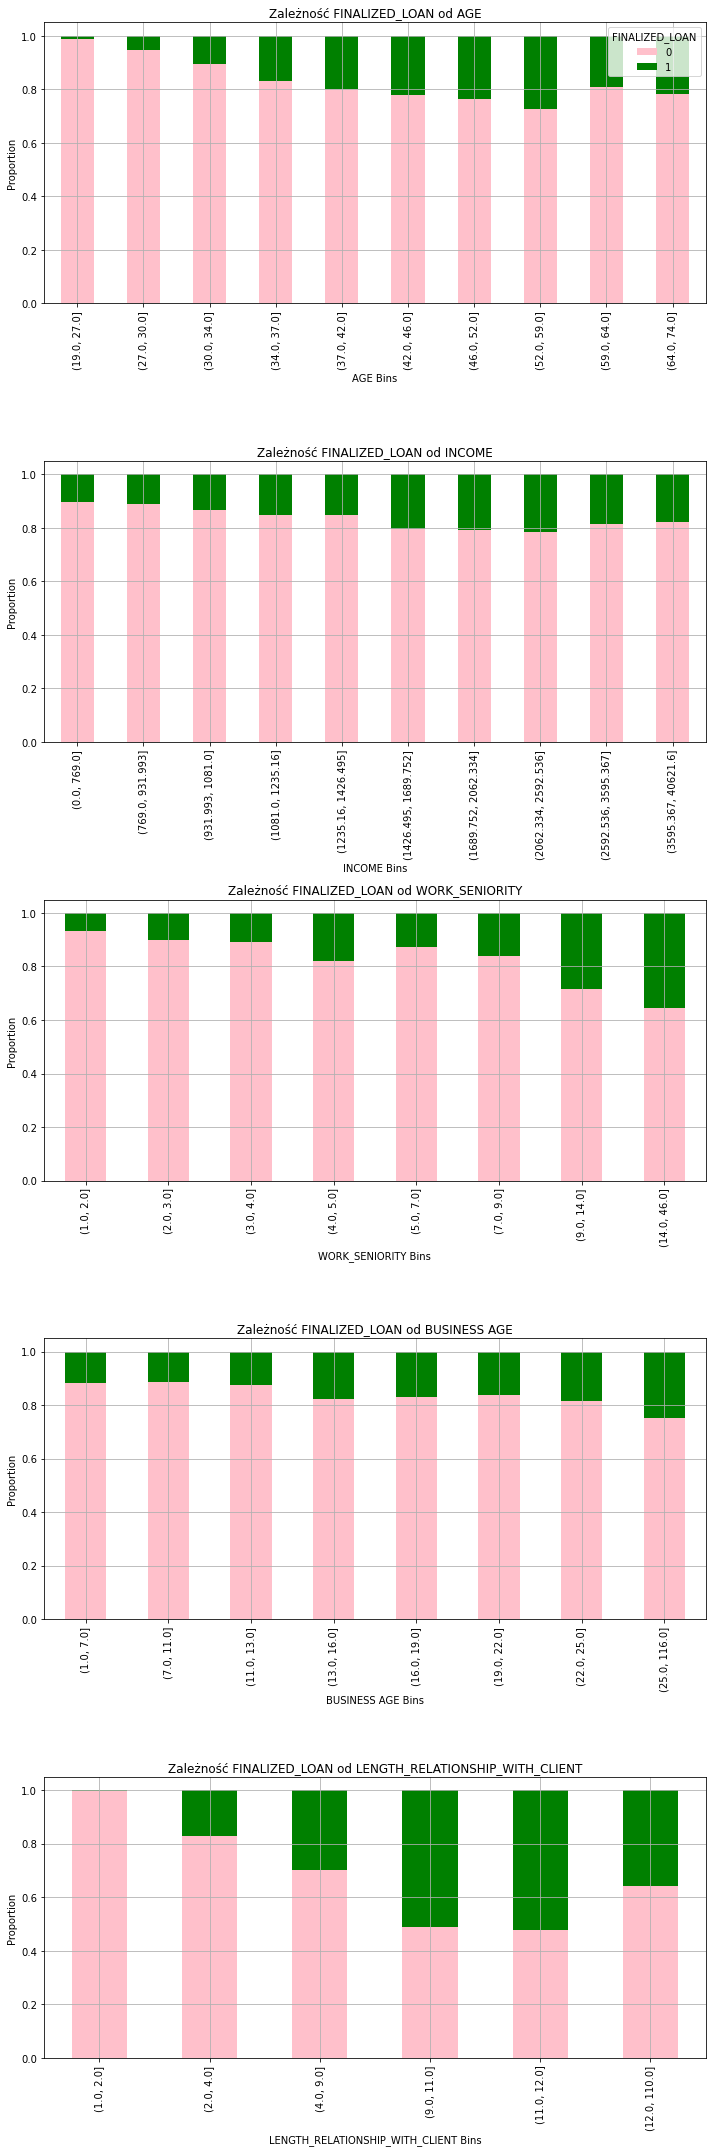

In [22]:
columns = ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']
cat = 'FINALIZED_LOAN'

fig, axs = plt.subplots(len(columns), 1, figsize=(10, 30), sharey=True)

for i, num in enumerate(columns):
    breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
    tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
    tmp = tmp[df[cat].unique()]
    tmp["tot"] = tmp.sum(axis=1)

    for col in tmp.drop("tot", axis=1).columns:
        tmp[col] = tmp[col] / tmp["tot"]
    
    tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=axs[i], legend=(i==0), grid=True, color=['pink', 'green'])
    axs[i].set_title(f'Zależność {cat} od {num}')
    axs[i].set_xlabel(f'{num} Bins')
    axs[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

#### Z naszą zmienną celu najsliniej skorelowana jest zmienna LENGTH_RELATIONSHIP_WITH_CLIENT.  Sporą korelację obserwujemy też między zmiennymi NO_OF_DEPENDENTS i HOUSEHOLD_MEMBERS oraz CURRENT_ACCOUNT i DEBIT_CARD

# Feature Engineering (FE)

Przekształcenie zmiennych kategorycznych: Zakodujemy zmienne kategoryczne za pomocą kodowania gorących jedynek (One-Hot Encoding), aby mogły być wykorzystane przez modele uczenia maszynowego.

Normalizacja zmiennych numerycznych: Normalizujemy zmienne numeryczne, aby mieć podobny zakres wartości.

Usunięcie niepotrzebnych kolumn: Kolumna 'PENSION_FUNDS' już została usunięte, ponieważ nie ma żadnego wpływu na wynik pożyczek.

Badanie korelacji: Przeprowadzimy analizę korelacji między cechami, aby zidentyfikować silne związki między nimi.

In [24]:
df_test = pd.read_csv('orig_test.csv')
df_test.drop('PENSION_FUNDS', axis=1, inplace=True)
df_train = df

### sprawdźmy czy zbiór testowy i treningowy są dobrze podzielone względem zmiennej celu

In [25]:
train_class_proportions = df_train['FINALIZED_LOAN'].value_counts(normalize=True)
test_class_proportions = df_test['FINALIZED_LOAN'].value_counts(normalize=True)

print("Proporcje klas w zbiorze treningowym:")
print(train_class_proportions)

print("\nProporcje klas w zbiorze testowym:")
print(test_class_proportions)


Proporcje klas w zbiorze treningowym:
0    0.835795
1    0.164205
Name: FINALIZED_LOAN, dtype: float64

Proporcje klas w zbiorze testowym:
0    0.836836
1    0.163164
Name: FINALIZED_LOAN, dtype: float64


### Kodowanie zmiennych kategorycznych za pomocą get_dummies z biblioteki Pandas

In [26]:
df_train = pd.get_dummies(df_train, columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO'])
df_test = pd.get_dummies(df_test, columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO'])
print(df_train.columns== df_test.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [27]:
df_train.columns

Index(['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
       'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT',
       'DEBIT_CARD', 'CURRENT_ACCOUNT', 'SAVING_ACCOUNT', 'SALARY_ACCOUNT',
       'FOREIGN_ACCOUNT', 'FINALIZED_LOAN', 'DEPOSIT', 'DEFAULT_FLAG',
       'PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_D', 'PRODUCT_E',
       'PRODUCT_F', 'AREA_County capital', 'AREA_Missing', 'AREA_Rural area',
       'AREA_Urban area', 'RESIDENTIAL_PLACE_Living with family',
       'RESIDENTIAL_PLACE_Other', 'RESIDENTIAL_PLACE_Owner with mortgage',
       'RESIDENTIAL_PLACE_Owner without mortgage', 'RESIDENTIAL_PLACE_Rental',
       'EDUCATION_College', 'EDUCATION_Highschool', 'EDUCATION_Middle school',
       'EDUCATION_Missing', 'EDUCATION_Other',
       'EDUCATION_Post secondary school', 'EDUCATION_Post-graduate',
       'EDUCATION_Primary school', 'EDUCATION_University',
       'EDUCATION_Vocational school', 'MARITAL_STATUS_divorced',
       'MARITAL_STATUS_

In [28]:
count_1 = df_train['FINALIZED_LOAN'].value_counts()[1]
print("Liczba wystąpień wartości 1 w kolumnie FINALIZED_LOAN:", count_1)


Liczba wystąpień wartości 1 w kolumnie FINALIZED_LOAN: 2479


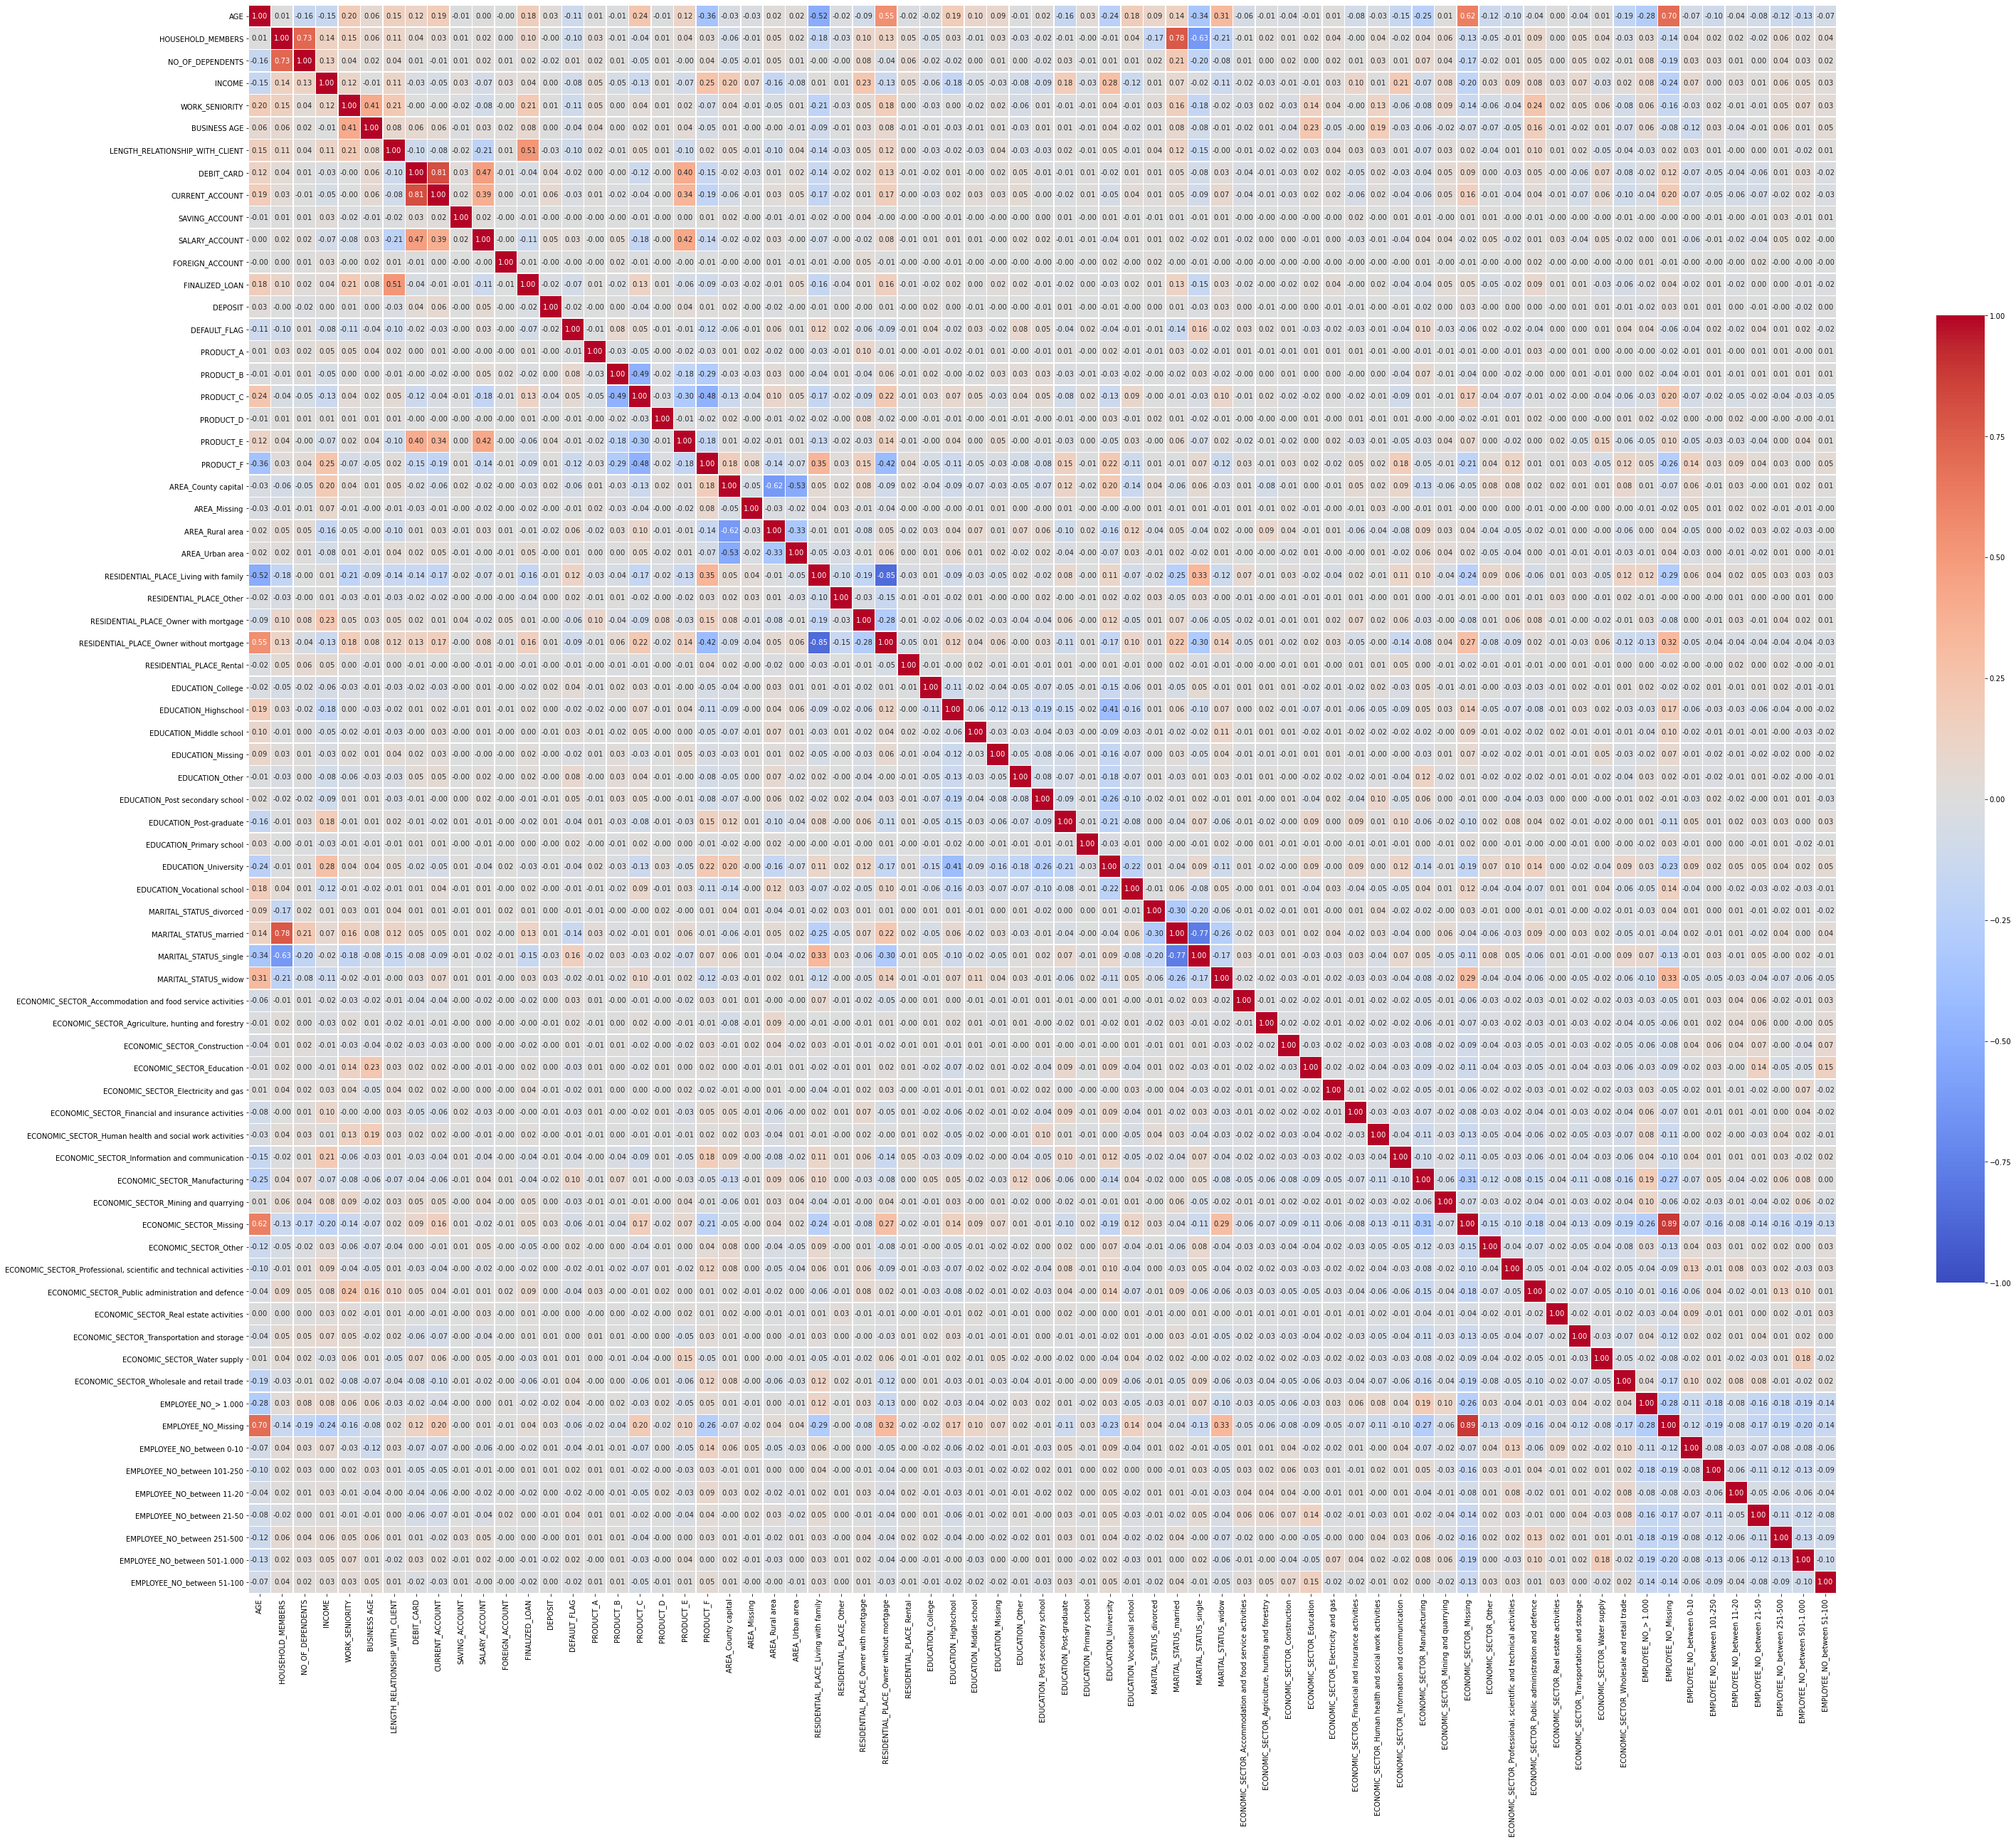

In [29]:
# Badanie korelacji
correlation_matrix = df_train.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

### Zastąpimy teraz Outliery z kolumn 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT' 99 percentylem

In [30]:
columns = ['INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']
percentiles = {col: df_train[col].quantile(0.99) for col in columns}
for col in columns:
    df_train.loc[df_train[col] > percentiles[col], col] = percentiles[col]
for col in columns:
    df_test.loc[df_test[col] > percentiles[col], col] = percentiles[col]

### Znormalizujmy zmienne ciągłe

In [31]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']


df_train_scaled = df_train.copy(deep=True)
df_test_scaled = df_test.copy(deep=True)

scaler = MinMaxScaler()

scaler.fit(df_train[columns_to_scale])
df_train_scaled[columns_to_scale] = scaler.transform(df_train_scaled[columns_to_scale])
df_test_scaled[columns_to_scale] = scaler.transform(df_test_scaled[columns_to_scale])
#zachowuje ramki przed skalowaniem, żeby zobaczyć czy modele lepiej poradzą sobie bez niego

In [32]:
print("Scaled Training Data:")
print(df_train_scaled)
print("\nScaled Test Data:")
print(df_test_scaled)

Scaled Training Data:
            AGE  HOUSEHOLD_MEMBERS  NO_OF_DEPENDENTS    INCOME  \
0      0.836364                  2                 0  0.143302   
1      0.818182                  2                 0  0.158841   
2      0.200000                  2                 0  0.130181   
3      0.363636                  1                 0  0.199127   
4      0.345455                  1                 0  0.136857   
...         ...                ...               ...       ...   
15092  0.218182                  2                 0  0.217083   
15093  0.636364                  1                 0  0.077119   
15094  0.472727                  1                 0  0.551801   
15095  0.690909                  2                 0  0.429746   
15096  0.345455                  2                 0  0.162064   

       WORK_SENIORITY  BUSINESS AGE  LENGTH_RELATIONSHIP_WITH_CLIENT  \
0            0.153846      0.214286                           0.0000   
1            0.153846      0.214286      

# tworzenie modeli

In [44]:
X_train = df_train_scaled.drop(columns=["FINALIZED_LOAN"])
y_train = df_train_scaled['FINALIZED_LOAN']

X_test = df_test_scaled.drop(columns=["FINALIZED_LOAN"])
y_test = df_test_scaled['FINALIZED_LOAN']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder




# Definicja cech numerycznych i kategorycznych
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns  # z X na X_train
categorical_features = X_train.select_dtypes(include=['object']).columns  # z X na X_train

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline zawierający przetwarzanie i klasyfikator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Wybór 10 najlepszych cech
    ('pca', PCA(n_components=5)),  # Redukcja wymiarowości do 5 komponentów PCA
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Klasyfikator RandomForest z ograniczeniem głębokości drzew
])

# Dopasowanie modelu
pipeline.fit(X_train, y_train)

# Ocena modelu
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")




Train Accuracy: 0.93
Test Accuracy: 0.87


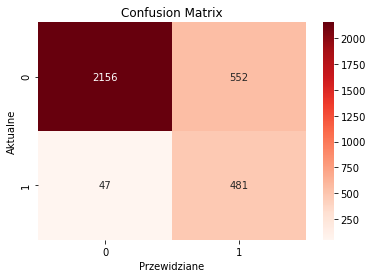

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='g')
plt.xlabel('Przewidziane')
plt.ylabel('Aktualne')
plt.title('Confusion Matrix')
plt.show()

# Modelowanie

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ponowne importowanie


models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "Random Forest Classifier": RandomForestClassifier()
         }
results = []

D:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Roc_auc scores for  Logistic Regression :  [0.88929434 0.88905017 0.88458089]
Mean roc_auc_score for  Logistic Regression :  0.8876417998464016
Median roc_auc_score for  Logistic Regression :  0.8890501731145356 

Roc_auc scores for  KNN :  [0.75342334 0.76573298 0.76699889]
Mean roc_auc_score for  KNN :  0.7620517377802324
Median roc_auc_score for  KNN :  0.7657329822041337 

Roc_auc scores for  Decision Tree Classifier :  [0.7177491  0.71428947 0.73846949]
Mean roc_auc_score for  Decision Tree Classifier :  0.723502688870019
Median roc_auc_score for  Decision Tree Classifier :  0.717749101624008 

Roc_auc scores for  Random Forest Classifier :  [0.92314131 0.91847572 0.91364789]
Mean roc_auc_score for  Random Forest Classifier :  0.9184216407356279
Median roc_auc_score for  Random Forest Classifier :  0.9184757240639705 



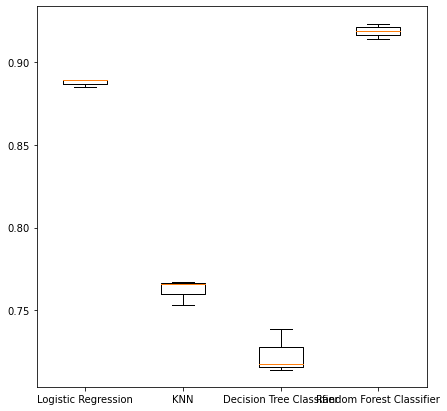

In [53]:
for model in models.values():
    kf = KFold(n_splits = 3, random_state = 420, shuffle = True)
    res_for_model = cross_val_score(model, X_train, y_train, cv = kf, scoring = "roc_auc")
    results.append(res_for_model)

i = 0
for name in models.keys():
    print("Roc_auc scores for ", name, ": ", results[i])
    print("Mean roc_auc_score for ", name, ": ", np.mean(results[i]))
    print("Median roc_auc_score for ", name, ": ", np.median(results[i]), "\n")
    i = i+1

plt.figure(figsize = (7,7))
plt.boxplot(results, labels = models.keys())
plt.show()